In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
train = pd.read_csv(r'C:\Users\hp\Documents\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

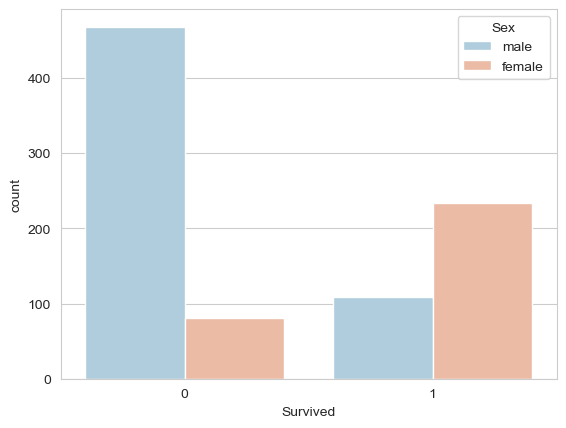

In [29]:
# checking people survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r',hue='Sex')

# to check the empty fields by heat map

<Axes: >

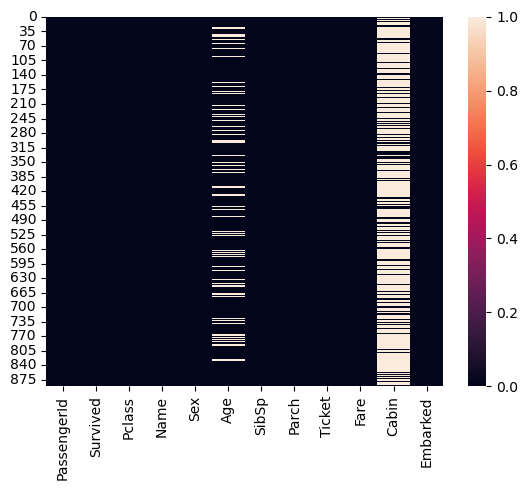

In [20]:
sns.heatmap(train.isnull())

AttributeError: 'numpy.int64' object has no attribute 'startswith'

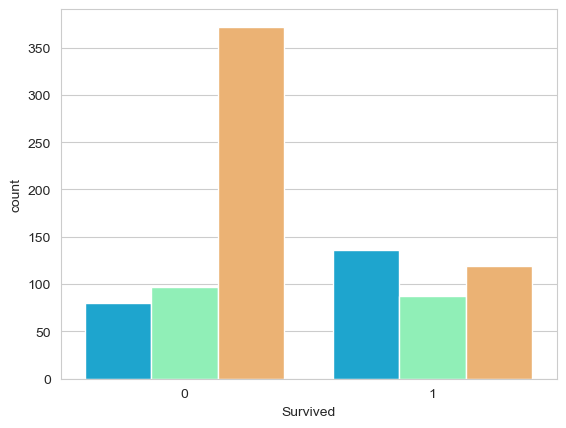

In [34]:
%matplotlib inline
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


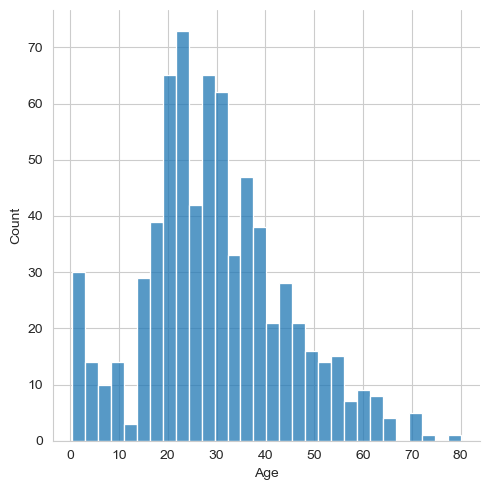

In [37]:
sns.displot(train['Age'].dropna(),bins=30)

In [38]:
import cufflinks as cf

In [39]:
cf.go_offline()

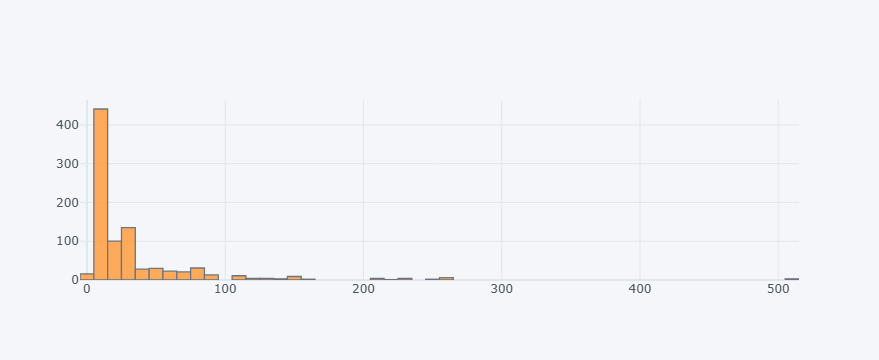

In [47]:
train['Fare'].iplot(kind='hist',bins=100)

# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

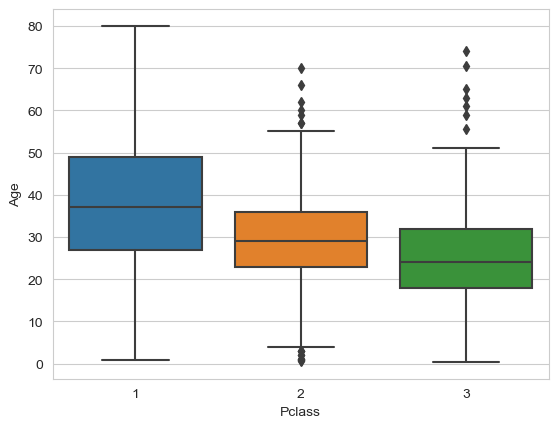

In [59]:

sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
# train['Age']= train[['Age','Pclass']].apply(impute_age)

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


   
    

In [16]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_5556\1466554594.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_5556\1466554594.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

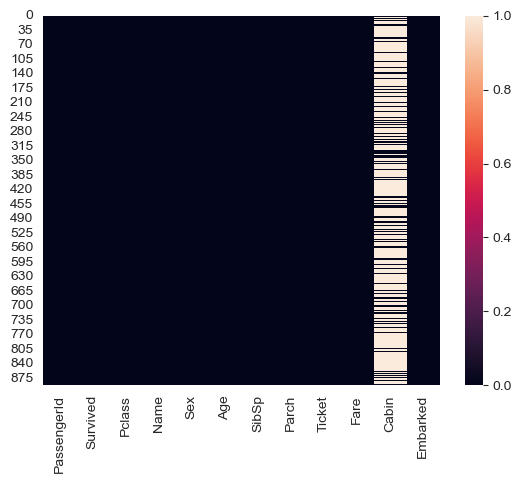

In [71]:

sns.heatmap(train.isnull())

In [17]:
train.dropna(inplace=True)


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
sex

,male
1,False
3,False
6,True
10,False
11,False
...,...
871,False
872,True
879,False
887,False


In [26]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [28]:
train = pd.concat([train,sex,embark],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True
6,7,0,1,54.0,0,0,51.8625,True,False,True
10,11,1,3,4.0,1,1,16.7000,False,False,True
11,12,1,1,58.0,0,0,26.5500,False,False,True


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X=train.drop('Survived',axis=1)  # features excluding Survived
y=train['Survived']        # y label output to classify
             

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
# Evaluation

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.84      0.88      0.86        41

    accuracy                           0.80        61
   macro avg       0.78      0.76      0.77        61
weighted avg       0.80      0.80      0.80        61



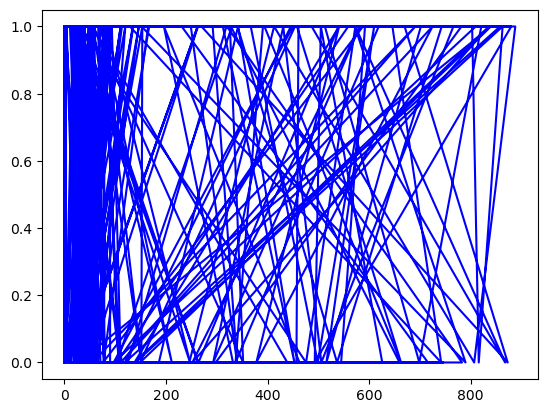

In [42]:
plt.plot(X_train,y_train,c ="blue")

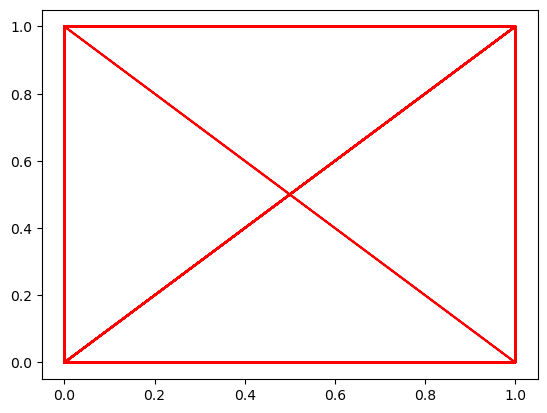

In [45]:
plt.plot(y_test,predictions,c ="red")